# Zomato Data Analysis

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants as well as food delivery options from partner restaurants in select cities.

## Problem Statement
In this session, we are going to analyze the restaurant business data. We want to study the food habbits of zomato users, their preferances, ratings etc. 

## Data description:

The collected data has been stored in the Comma Separated Value file Zomato.csv. Each restaurant in the dataset is uniquely identified by its Restaurant Id. Every Restaurant contains the following variables:

• **Restaurant Id**: Unique id of every restaurant across various cities of the world

• **Restaurant Name**: Name of the restaurant

• **Country Code**: Country in which restaurant is located

• **City**: City in which restaurant is located

• **Address**: Address of the restaurant

• **Locality**: Location in the city

• **Locality Verbose**: Detailed description of the locality

• **Longitude**: Longitude coordinate of the restaurant's location

• **Latitude**: Latitude coordinate of the restaurant's location

• **Cuisines**: Cuisines offered by the restaurant

• **Average Cost for two**: Cost for two people in different currencies 👫 

• **Currency**: Currency of the country

• **Has Table booking**: yes/no

• **Has Online delivery**: yes/ no

• **Is delivering**: yes/ no

• **Switch to order menu**: yes/no

• **Price range**: range of price of food

• **Aggregate Rating**: Average rating out of 5

• **Rating color**: depending upon the average rating color

• **Rating text**: text on the basis of rating of rating

• **Votes**: Number of ratings casted by people


**There is another dataset which has the country codes in it**

### Import Libraries

In [26]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Read the data and merge the two different datasets

In [27]:
# Read the csv file
df = pd.read_csv('../data/zomato.csv',encoding="ISO-8859-1")
df.head(5)

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [28]:
# Read the excel file

country = pd.read_csv('../data/Country_Code.csv')
country.head(5)

Country Code    Country
0             1      India
1            14  Australia
2            30     Brazil
3            37     Canada
4            94  Indonesia

In [29]:
# Merge two files

data = pd.merge (df,country, on = 'Country Code')
data.head(5)

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...  Has Table booking  \
0        French, Japanese, Desserts  ...                Yes   
1                          Japanese  ...                Yes   
2  Seafood, Asian, Filipino, Indian  ...                Yes   
3                   Japanese, Sushi  ...                 No   
4                  Japanese, Korean  ...                Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

  Aggregate rating  Rating color  Rating text Votes      Country  
0              4.8    Dark Green    Excellent   314  Phillipines  
1              4.5    Dark Green    Excellent   591  Phillipines  
2              4.4         Green    Very Good   270  Phillipines  
3              4.9    Dark Green    Excellent   365  Phillipines  
4              4.8    Dark Green    Excellent   229  Phillipines  

[5 rows x 22 columns]

### Basic Data Study

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [31]:
data.describe()

Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
25%              250.000000     1.000000          2.500000      5.000000  
50%              400.000000     2.000000          3.200000     31.000000  
75%              700.000000     2.000000          3.700000    131.000000  
max           800000.000000     4.000000          4.900000  10934.000000

In [32]:
data.head(1)

Restaurant ID   Restaurant Name  Country Code         City  \
0        6317637  Le Petit Souffle           162  Makati City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   

                                    Locality  \
0  Century City Mall, Poblacion, Makati City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   

                     Cuisines  ...  Has Table booking Has Online delivery  \
0  French, Japanese, Desserts  ...                Yes                  No   

  Is delivering now Switch to order menu Price range Aggregate rating  \
0                No                   No           3              4.8   

   Rating color  Rating text Votes      Country  
0    Dark Green    Excellent   314  Phillipines  

[1 rows x 22 columns]

### Number of Restaurants by Country on Zomato


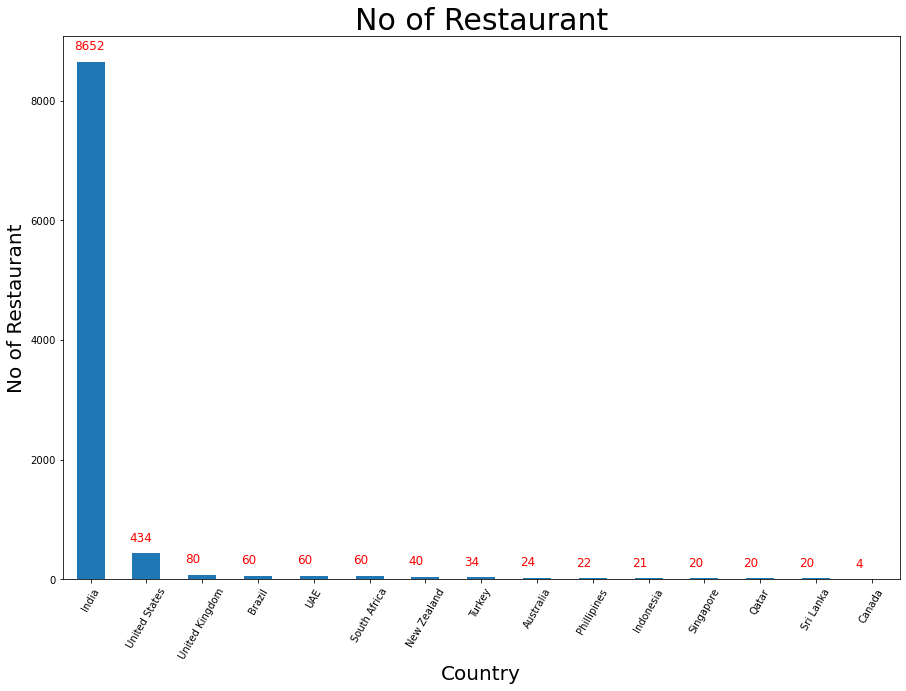

In [33]:
countries = data['Country'].value_counts()
plt.figure(figsize=(15,10))
countries.plot(kind = 'bar')
plt.xlabel('Country', fontsize=20)
plt.ylabel('No of Restaurant', fontsize=20)
plt.title('No of Restaurant', fontsize=30)
plt.xticks(rotation = 60)

for idx, val in enumerate(data['Country'].value_counts()):
    plt.text(x = idx-0.3, y = val+200 , s = val, color = 'red', fontsize = 12)

### Which city has the maximum number of Restaurents?

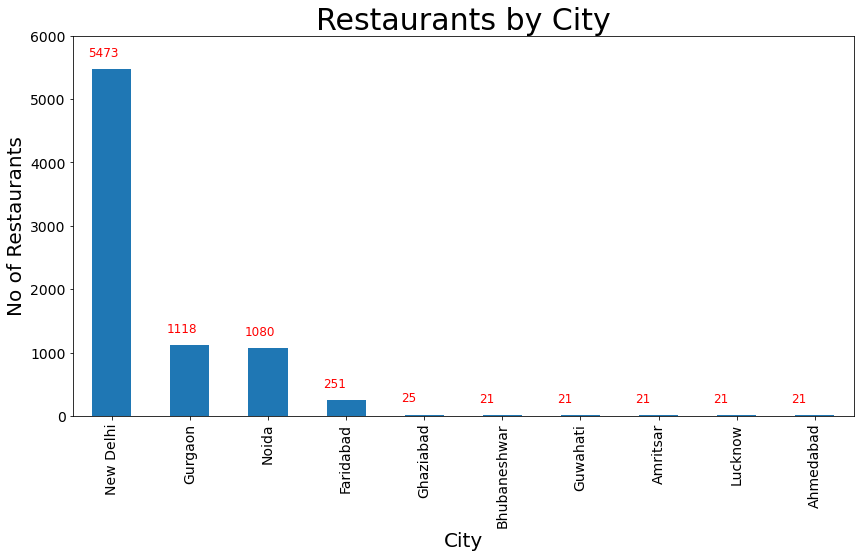

In [15]:
city = data['City'].value_counts(ascending = False)[:10]
city.plot(kind = 'bar', figsize = (14,7), fontsize = 14)
#city.plot.bar(figsize=(14, 7),fontsize=14)
plt.title('Restaurants by City', fontsize=30)                                             
plt.xlabel('City', fontsize=20)
plt.ylabel('No of Restaurants', fontsize=20)
plt.ylim(0,6000)
for idx, val in enumerate(data['City'].value_counts()[:10]):
    plt.text(x = idx - 0.3, y = val + 200 , s = val, color = 'red', fontsize = 12)
plt.show()

### What is the condition of online delivery in India ?

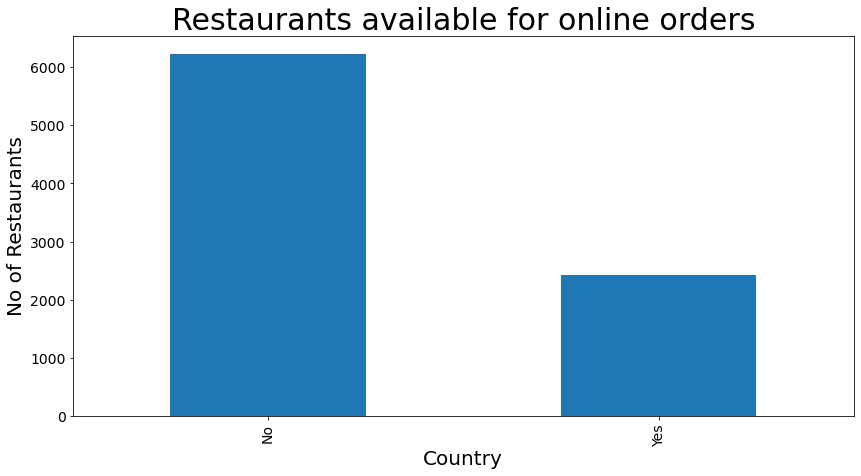

In [16]:
data_india = data[data['Country'] == 'India']
data_india['Has Online delivery'].value_counts().plot.bar(figsize=(14, 7), 
                                             fontsize=14)
plt.xlabel('Country', fontsize=20)
plt.ylabel('No of Restaurants', fontsize=20)
plt.title('Restaurants available for online orders', fontsize=30)
plt.show()

### What are the top cuisines on Zomato?

In [17]:
cuisine_count = []

for v in data['Cuisines'].values:
    if isinstance (v, str):
        cus = v.split(',')
    for c in cus:
        cuisine_count.append(c.strip())

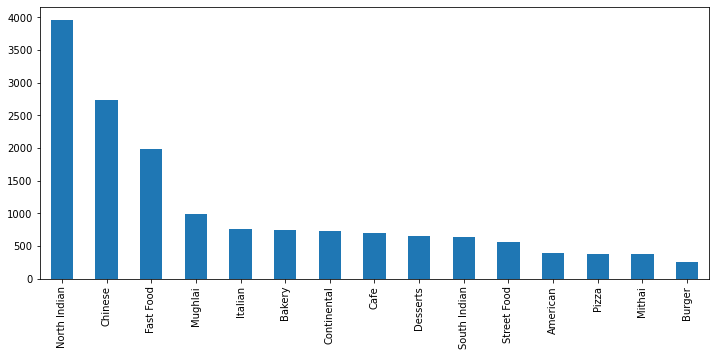

In [18]:
pd.Series(cuisine_count).value_counts()[:15].plot(kind = 'bar', figsize = (12,5))
plt.show()

C:\Users\gmahi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


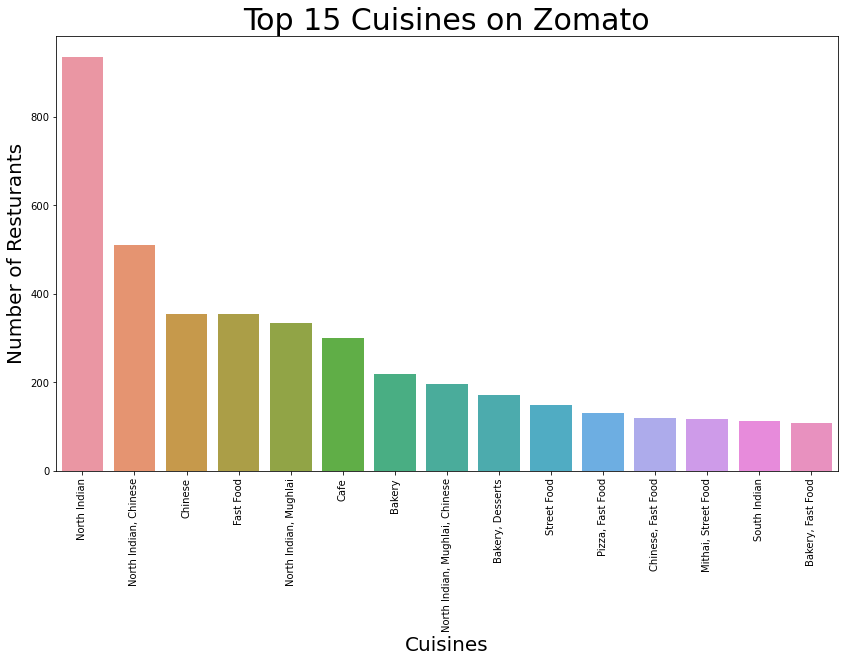

In [19]:
plt.figure(figsize = (14,8))
sns.barplot(data['Cuisines'].value_counts()[:15].index,data['Cuisines'].value_counts()[:15])
plt.xlabel('Cuisines', fontsize=20)
plt.ylabel('Number of Resturants', fontsize=20)
plt.title('Top 15 Cuisines on Zomato', fontsize=30)
plt.xticks(rotation = 90)
plt.show()

## Top Cuisine by city

In [14]:
city_cuisines = []
for idx, row in data.iterrows():
    if isinstance(row['Cuisines'], str):
        city = row['City']
        for c in row['Cuisines'].split(','):
            city_cuisines.append({
                'city': city,
                'cuisines': c.strip()
            })
        print(row['Cuisines'])

French, Japanese, Desserts
Japanese
Seafood, Asian, Filipino, Indian
Japanese, Sushi
Japanese, Korean
Chinese
Asian, European
Seafood, Filipino, Asian, European
European, Asian, Indian
Filipino
Filipino, Mexican
American, Ice Cream, Desserts
Filipino, Mexican
Filipino
Korean
Cafe, American, Italian, Filipino
Italian, Pizza
Filipino
Cafe, Korean, Desserts
Cafe, Bakery, American, Italian
Seafood, American, Mediterranean, Japanese
American, Asian, Italian, Seafood
Fast Food, French
Cafe
Bakery
Brazilian
Pizza
Japanese
Arabian
Japanese
Brazilian, Cafe
Italian
Pizza
Bar Food, Brazilian
Mexican, Grill
International
Peruvian, Latin American
American, Grill
Seafood
International
Italian
American, Burger
Seafood, Bar Food, Brazilian
Desserts, Cafe
Juices, Healthy Food
Beverages, Bar Food, Fast Food
Lebanese
Burger
Brazilian, Bar Food
Brazilian, Healthy Food, Juices, Pizza
Brazilian, Bar Food
Brazilian
Brazilian
Italian
Japanese
Bakery, Sandwich, Brazilian
Brazilian
Brazilian, Seafood
Bar Food, 

North Indian, Mughlai, Chinese
North Indian
Italian, North Indian
North Indian, Chinese
Raw Meats, Fast Food
North Indian, Chinese
Pizza, Fast Food
Raw Meats, North Indian, Fast Food
North Indian, Mughlai
Italian, Fast Food
Mithai, South Indian, Chinese, Street Food
North Indian, Chinese, Mughlai
Fast Food
North Indian, South Indian, Chinese
North Indian
Bakery
Chinese, North Indian
Fast Food, Chinese
North Indian, Mughlai
Bakery
South Indian
Raw Meats, Fast Food, North Indian
North Indian, South Indian, Chinese, Fast Food
Bakery
North Indian, Chinese
Mithai
Mithai, Bakery, Street Food, Chinese, South Indian
Mithai, Street Food
North Indian
North Indian, Chinese
Pizza, Fast Food
North Indian, Chinese, Fast Food
North Indian, Chinese, Continental
North Indian, Chinese
Pizza
North Indian, Chinese
North Indian, Chinese, Raw Meats
North Indian, Chinese
Bakery, Fast Food
North Indian, Mughlai, Chinese
North Indian, Chinese, Mughlai
Mughlai
Bakery, Fast Food
Bakery, Desserts
Chinese
North In

North Indian
Bakery, Desserts
Biryani
North Indian, South Indian, Fast Food, Street Food, Chinese, Beverages, Desserts, Mithai
North Indian, Mughlai
Chinese, Thai, Malaysian, Indonesian
North Indian, Mughlai, Biryani
Fast Food, North Indian, Chinese
Chinese, Thai
Lebanese
Ice Cream, Desserts
Ice Cream, Desserts
Bakery, Desserts, Fast Food
North Indian, Mughlai
North Indian, Street Food
Chinese, Thai
Goan
Hyderabadi, North Indian, Biryani
North Indian, Mughlai
North Indian
Fast Food, North Indian
North Indian, Rajasthani, Asian
Bakery
Bakery
North Indian, Chinese
Bengali, Fast Food
North Indian, Fast Food
Bakery
Healthy Food, North Indian, Italian, Salad
Italian, Pizza, Fast Food
North Indian
Biryani
Fast Food
North Indian, Mughlai, Chinese
Cafe, Fast Food
South Indian, Desserts, Beverages
Bakery
Mughlai, Biryani
North Indian
Pizza, Fast Food
Goan, American, Portuguese
North Indian, Mughlai, Chinese
North Indian, Chinese
Rajasthani
Fast Food, North Indian
Desserts
Chinese
Cafe
North Ind

North Indian, South Indian
North Indian, Mughlai
Pizza, Fast Food
Mughlai
Bakery, Fast Food
Chinese
Chinese, Japanese
Mithai, Street Food
Cafe
Fast Food, Street Food
Bakery, Desserts
North Indian, Chinese, Mughlai
Mughlai, North Indian, Chinese
Bakery, Desserts
North Indian, Mughlai
Bakery, Desserts
North Indian, Bengali
Pizza, Fast Food
North Indian, Mughlai
Bakery, Desserts
Desserts
Ice Cream, Desserts
Ice Cream, Desserts
Raw Meats, North Indian, Fast Food
North Indian
Fast Food
Desserts
Fast Food, Chinese
Mithai, Street Food
North Indian, Mughlai
Continental, Chinese, North Indian
Continental
North Indian, Mughlai
North Indian, Chinese
North Indian, Mughlai
North Indian, Mughlai, Chinese
North Indian, Chinese, Mughlai
Bakery
Fast Food
North Indian
North Indian, Mughlai, Chinese
Italian
Chinese, Thai
Cafe, Italian
Bakery, Desserts, Fast Food
Lebanese, Arabian
Ice Cream
Cafe, Italian, Chinese
Mughlai, Fast Food
Desserts
North Indian, Mughlai, Chinese
Biryani, North Indian, Mughlai
Con

North Indian, Fast Food, Bihari
North Indian, Continental
Modern Indian
Street Food
Modern Indian, North Indian
Cafe
Cafe, Desserts, Healthy Food, Juices
Fast Food
Italian, Mediterranean
North Indian, Spanish, Mediterranean
North Indian, Lebanese, European, Mexican
Fast Food, Burger
North Indian, Continental
Street Food
Finger Food, North Indian
North Indian, South Indian, Street Food
Cafe
Bakery
Chinese, Fast Food, Pizza
North Indian, Mughlai
North Indian, Mughlai
North Indian, South Indian
American, Italian, North Indian, European, Thai
North Indian, Italian, Continental, Asian
South Indian
North Indian, American, Chinese
Cafe
North Indian
Beverages, Fast Food
Beverages, Fast Food
Chinese
North Indian, Italian, Continental
Continental, Italian
Fast Food
Fast Food
North Indian, Mughlai
Italian, Pizza, Fast Food
Continental, North Indian, Chinese, Mughlai, Asian
American, Fast Food, Salad, Healthy Food
Japanese
North Indian, Fast Food
Continental, North Indian, Chinese, Cafe
Cafe
Itali

Bihari
North Indian, Fast Food
Cafe, American, Italian
Cafe, Bakery, Parsi
Healthy Food, Salad
Cafe, Desserts
Sushi, Japanese, Healthy Food
Cafe, Fast Food, Healthy Food
Chinese
Chinese
Fast Food
Bakery
North Indian, Continental
North Indian
North Indian, Chinese
North Indian
Raw Meats, North Indian, Fast Food
South Indian, Chinese
Biryani, Kerala
South Indian, Chinese
Mithai, Street Food
Pizza, Fast Food
Bakery, Fast Food
Chinese
North Indian, Mughlai, Chinese
North Indian
North Indian, Chinese
Chinese, North Indian
North Indian
North Indian, Chinese
Fast Food
Chinese, North Indian
Mithai, Street Food
North Indian
North Indian, Mughlai, Chinese
North Indian
Desserts, Street Food
Ice Cream
North Indian, Chinese, Mughlai
North Indian, Chinese
North Indian
North Indian, Mughlai
Chinese
Chinese
Bakery, Fast Food
North Indian, Mughlai, Chinese
Fast Food, Chinese
North Indian, Chinese
Bakery
Mithai, Street Food
North Indian, Chinese, Mughlai
Raw Meats, North Indian, Fast Food
North Indian
N

Bakery, Desserts
Bakery, Fast Food, Chinese
North Indian
Chinese, Fast Food
Fast Food
Street Food, North Indian
North Indian, Chinese, Fast Food
Bakery, Desserts, Fast Food
Mithai
Mithai, Street Food
South Indian, Chinese
Raw Meats, North Indian, Fast Food
Chinese, Continental
Hyderabadi, Fast Food
Continental, North Indian
Mughlai, North Indian, Chinese
Fast Food, Healthy Food
Bakery
Street Food
North Indian
Bakery, Fast Food
Fast Food
Bakery
Chinese, Beverages
North Indian, Biryani, Chinese, Fast Food
Street Food
Fast Food, Desserts, Beverages
North Indian
Chinese
Mughlai
Pizza, Fast Food
South Indian, Chinese
Desserts, Beverages
Fast Food
Chinese
North Indian, Mithai, South Indian, Street Food, Chinese
South Indian, North Indian, Chinese
Biryani
North Indian, South Indian, Bihari
Chinese, Fast Food
Chinese
Bakery, Desserts
Fast Food
Ice Cream, Desserts
Street Food, Mithai
North Indian, Mughlai, Chinese
Chinese
Chinese, North Indian
Bakery, Desserts
Bakery
North Indian
North Indian, 

North Indian, Mughlai, Chinese
Chinese, Continental, Thai
North Indian, Chinese, Continental
Italian, Pizza, Fast Food
North Indian, Chinese, Continental
North Indian, Fast Food
Mithai, Chinese
Chinese, Fast Food
South Indian
Fast Food, Italian
North Indian, Chinese
North Indian
North Indian
Street Food, Chinese
Chinese, North Indian
North Indian
Bakery, Fast Food
North Indian, Chinese
North Indian, Fast Food
North Indian
Beverages, Fast Food
North Indian, Mughlai
Cafe
Mithai
Raw Meats, North Indian
Chinese
North Indian, Chinese
Chinese, Fast Food
North Indian
Chinese, South Indian
North Indian
Ice Cream
Cafe, Fast Food, Bakery
North Indian
Fast Food
Chinese, North Indian
Bakery
Mithai
Chinese
Fast Food
North Indian, Mughlai
Street Food
North Indian
Street Food
Street Food
North Indian
Raw Meats, Fast Food
Fast Food
Fast Food
South Indian
Biryani
Bakery, Fast Food
North Indian
Fast Food
South Indian, Street Food, Mithai
Chinese
North Indian, South Indian, Chinese, Street Food, Fast Foo

Mithai, North Indian, South Indian, Street Food, Chinese
Mughlai, North Indian
American, Fast Food, Burger
North Indian, Street Food
North Indian, South Indian, Chinese, Street Food, Fast Food, Mithai, Desserts
North Indian, Mughlai
North Indian, Chinese, Continental
North Indian, Fast Food
North Indian, Chinese, Continental
North Indian, Chinese
South Indian, North Indian, Chinese
Pizza, Italian
North Indian, Chinese, Mughlai
North Indian, Mughlai, Chinese
North Indian, Mughlai
Fast Food, North Indian
North Indian, Chinese
North Indian, Mughlai, Chinese
Italian, Continental, North Indian, Chinese
Finger Food, North Indian, Chinese
Bakery, Desserts, Fast Food
North Indian, Continental, Thai, Chinese
Bakery, Beverages, Fast Food
Chinese, Seafood, Asian
North Indian, Fast Food, Chinese
North Indian, South Indian, Fast Food, Street Food, Chinese, Beverages, Desserts, Mithai
Biryani, North Indian, Hyderabadi
American, Italian, Chinese, North Indian, Cafe
Cafe
Biryani, North Indian, Mughlai

In [15]:
city_cuisines

[{'city': 'Makati City', 'cuisines': 'French'},
 {'city': 'Makati City', 'cuisines': 'Japanese'},
 {'city': 'Makati City', 'cuisines': 'Desserts'},
 {'city': 'Makati City', 'cuisines': 'Japanese'},
 {'city': 'Mandaluyong City', 'cuisines': 'Seafood'},
 {'city': 'Mandaluyong City', 'cuisines': 'Asian'},
 {'city': 'Mandaluyong City', 'cuisines': 'Filipino'},
 {'city': 'Mandaluyong City', 'cuisines': 'Indian'},
 {'city': 'Mandaluyong City', 'cuisines': 'Japanese'},
 {'city': 'Mandaluyong City', 'cuisines': 'Sushi'},
 {'city': 'Mandaluyong City', 'cuisines': 'Japanese'},
 {'city': 'Mandaluyong City', 'cuisines': 'Korean'},
 {'city': 'Mandaluyong City', 'cuisines': 'Chinese'},
 {'city': 'Pasay City', 'cuisines': 'Asian'},
 {'city': 'Pasay City', 'cuisines': 'European'},
 {'city': 'Pasay City', 'cuisines': 'Seafood'},
 {'city': 'Pasay City', 'cuisines': 'Filipino'},
 {'city': 'Pasay City', 'cuisines': 'Asian'},
 {'city': 'Pasay City', 'cuisines': 'European'},
 {'city': 'Pasay City', 'cuisine

## All this is something we have already done before and will do it later as well, isn't it? 
## Is there a better way to find out these insgihts without writing much of the code.
## This is where Pandas_profiling library enters

We need to check are we able to answer the above asked questions with it:

* Number of Restaurants by Country on Zomato
* Which city has the maximum number of Restaurants?
* What is the condition of online delivery in India ?
* What are the top cuisines on Zomato?

**Conda install the library**

In [16]:
# !pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
# !pip install psycopg2

In [24]:
import pandas_profiling
from pandas_profiling import ProfileReport

profile = ProfileReport(data, title="Pandas Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [25]:
profile.to_widgets()

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [19]:
profile.to_file("your_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Average Ratings on Countries

C:\Users\gmahi\AppData\Local\Temp/ipykernel_6476/2220028189.py:8: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


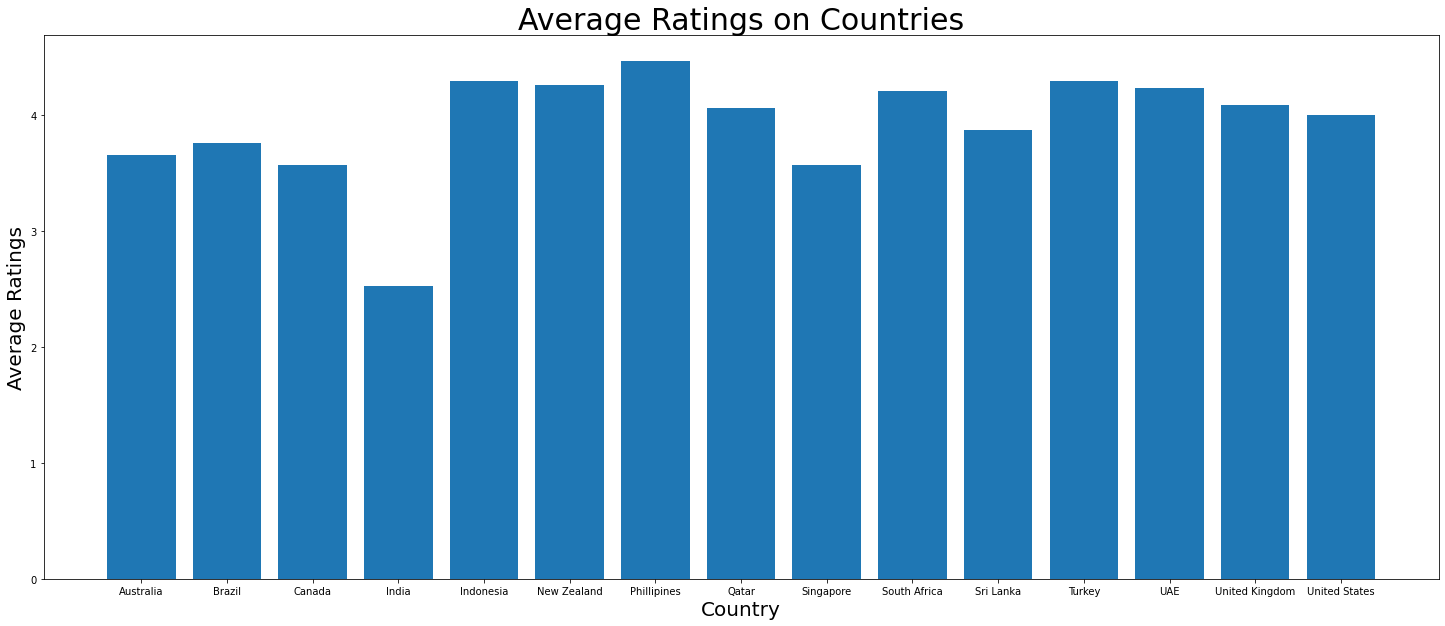

In [20]:
country_average = data.groupby('Country')['Aggregate rating'].mean().reset_index()

plt.figure(figsize=(25,10))
plt.xlabel('Country', fontsize=20)
plt.ylabel('Average Ratings', fontsize=20)
plt.title('Average Ratings on Countries', fontsize=30)
plt.bar(country_average['Country'], country_average['Aggregate rating'])
plt.show()

**Is the restaurent industry so bad or is there something we are missing?**

### Plot the ratings histogram for Indian restaurents

C:\Users\gmahi\AppData\Local\Temp/ipykernel_6476/1106285554.py:4: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


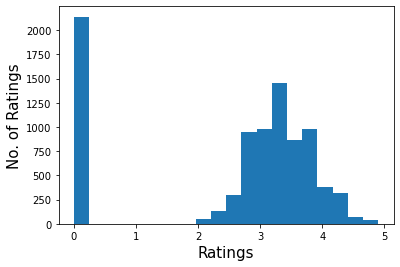

In [21]:
plt.hist(data[data['Country'] == 'India']['Aggregate rating'],bins = 20)
plt.xlabel('Ratings',fontsize = 15)
plt.ylabel('No. of Ratings',fontsize= 15)
plt.show()

### More than 2000 restaurents have been rated 0. Check the rating text as well as the votes of these restaurants 

C:\Users\gmahi\AppData\Local\Temp/ipykernel_6476/1646163148.py:4: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


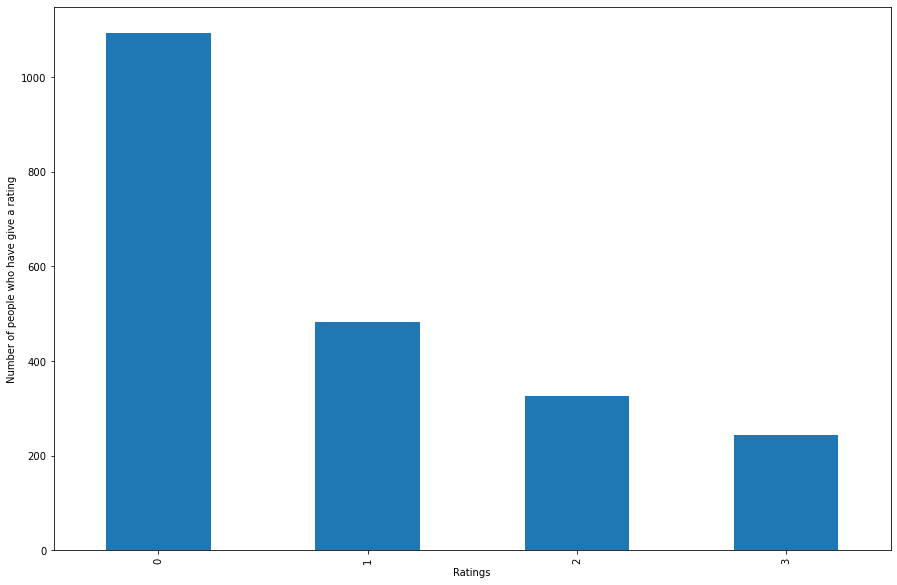

In [22]:
data[data['Aggregate rating'] == 0]['Votes'].value_counts().plot(kind = 'bar',figsize =(15,10))
plt.xlabel('Ratings')
plt.ylabel('Number of people who have give a rating')
plt.show()

**As you can see, the average ratings is getting influenced by the fact that there are multiple restaurents which have less than 3 votes and mostly 0 votes. If you check the Rating text for these which says `Not Rated` as well**

## Word cloud for the most popular restaurants

C:\Users\gmahi\AppData\Local\Temp/ipykernel_6476/686760809.py:9: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


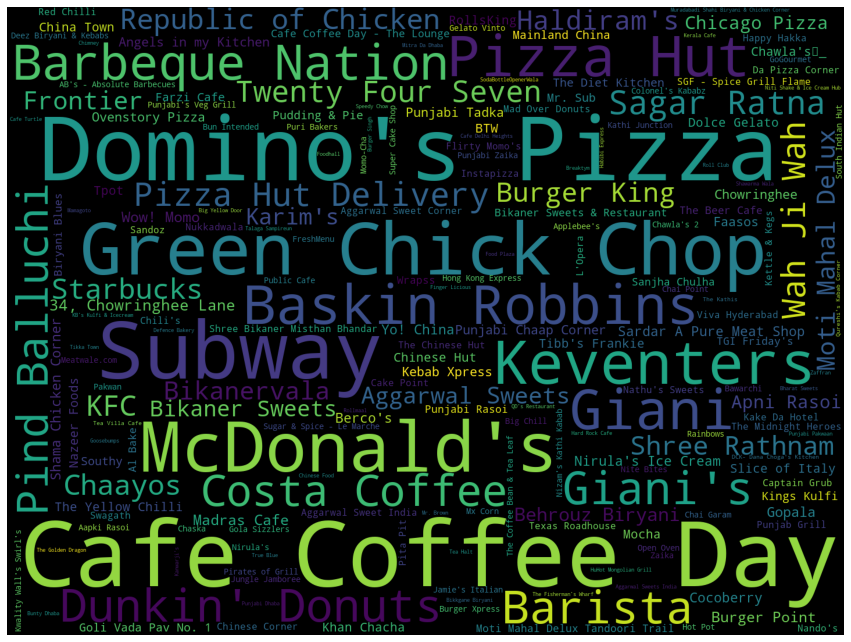

In [23]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
wordcloud = (WordCloud(width=1440, height=1080, relative_scaling=0.5, stopwords=stopwords).generate_from_frequencies(data['Restaurant Name'].value_counts()))


fig = plt.figure(1,figsize=(15, 15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()